# model to classify employees based on the likelihood of the churn

In [1]:
import pandas as pd
from churn_classifier.data_cleaning import clean_dataset
from churn_classifier.classification_evaluation import classification_eval
from churn_classifier.utils import get_X_y
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

PATH = "datasets/employee-churn/churn.csv"
dataset = pd.read_csv(PATH)
dataset = clean_dataset(dataset)

## ML based methods

### Already trained model

The best model from the `loyal_employees` notebook was trained excluding the categorical columns

The mean cross-validation accuracy is: 0.779 ± 0.003
Classification Report:
               precision    recall  f1-score   support

 Not looking       0.83      0.89      0.86     14381
     Looking       0.57      0.45      0.51      4777

    accuracy                           0.78     19158
   macro avg       0.70      0.67      0.68     19158
weighted avg       0.77      0.78      0.77     19158



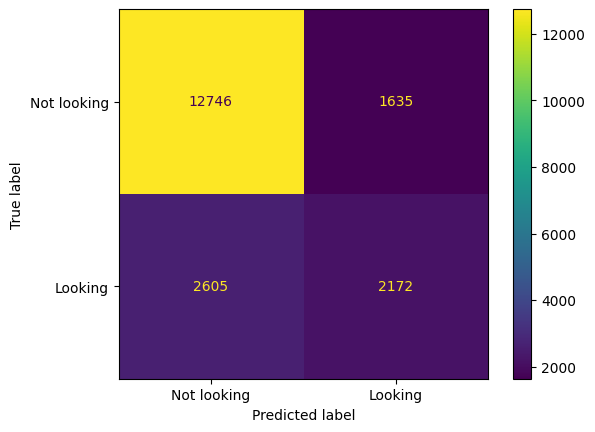

In [2]:
from sklearn.model_selection import cross_validate, cross_val_predict

X, y = get_X_y(dataset)

categorical_cols = ["city", "gender", "enrolled_university", "major_discipline", "company_type"]
X.drop(categorical_cols, axis=1, inplace=True)

model = RandomForestClassifier(n_estimators=100, random_state=42)
cv_result = cross_validate(model, X, y, cv=5)

scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: " f"{scores.mean():.3f} ± {scores.std():.3f}")

y_pred = cross_val_predict(model, X, y, cv=5)

classification_eval(
    y_test=y,
    y_pred=y_pred,
)

### LogisticRegression without categorical column

The mean cross-validation accuracy is: 0.766 ± 0.002
Classification Report:
               precision    recall  f1-score   support

 Not looking       0.79      0.94      0.86     14381
     Looking       0.57      0.25      0.35      4777

    accuracy                           0.77     19158
   macro avg       0.68      0.60      0.60     19158
weighted avg       0.74      0.77      0.73     19158



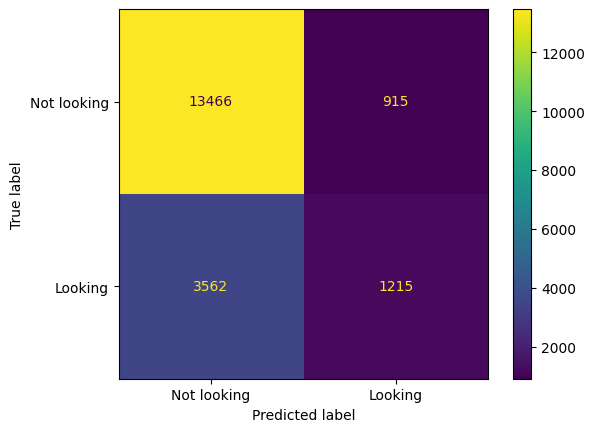

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X, y = get_X_y(dataset)

X.drop(categorical_cols, axis=1, inplace=True)

scaler = StandardScaler()
X = scaler.fit_transform(X)

model = LogisticRegression()
cv_result = cross_validate(model, X, y, cv=5)

scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: " f"{scores.mean():.3f} ± {scores.std():.3f}")

y_pred = cross_val_predict(model, X, y, cv=5)

classification_eval(
    y_test=y,
    y_pred=y_pred,
)

### OrdinalEncoder for categorical column & HistGradientBoostingClassifier

The mean cross-validation accuracy is: 0.799 ± 0.007
Classification Report:
               precision    recall  f1-score   support

 Not looking       0.87      0.86      0.86     14381
     Looking       0.59      0.62      0.60      4777

    accuracy                           0.80     19158
   macro avg       0.73      0.74      0.73     19158
weighted avg       0.80      0.80      0.80     19158



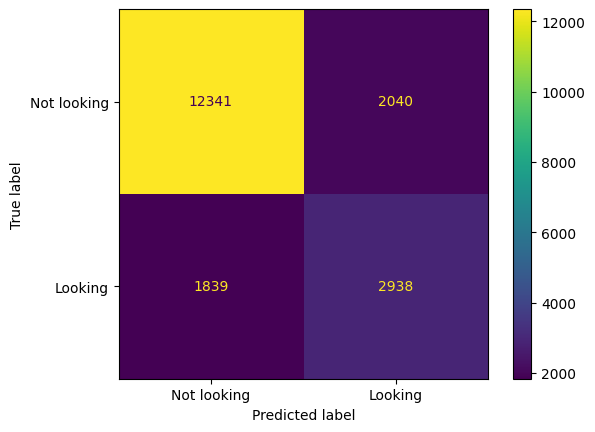

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

X, y = get_X_y(dataset)

categorical_preprocessor = OrdinalEncoder(
    handle_unknown="use_encoded_value",
    unknown_value=-1,
)

preprocessor = ColumnTransformer(
    [("categorical", categorical_preprocessor, categorical_cols)],
    remainder="passthrough",
)

model = make_pipeline(preprocessor, HistGradientBoostingClassifier())
cv_result = cross_validate(model, X, y, cv=5)

scores = cv_result["test_score"]
print("The mean cross-validation accuracy is: " f"{scores.mean():.3f} ± {scores.std():.3f}")

y_pred = cross_val_predict(model, X, y, cv=5)

classification_eval(
    y_test=y,
    y_pred=y_pred,
)